# Bank Customer Churn EDA
An example of exploratory data analysis using several **Python** libraries, including **pandas, matplotlib and seaborn**.

Customers stopping using a company services and products is referred to as customer churn. The objective of this analysis is to determine which factors have an influence on the customer churn and identify customer demographics with high churn rate. This would allow the bank to mitigate churn by focusing on these customers.

### Dataset
The dataset used is _Bank Customer Churn_ obtained from [Kaggle](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn), and it consists a single data table in csv format containing data about customers. The table has the following fields:

- **RowNumber**
- **CustomerId**
- **Surname**
- **CreditScore**
- **Geography**
- **Gender**.
- **Age**
- **Tenure**
- **Balance**
- **NumOfProducts** — number of products that a customer has purchased through the bank.
- **HasCrCard** — whether or not a customer has a credit card.
- **IsActiveMember** — whether a customer is frequently engaging with the bank's services.
- **EstimatedSalary**
- **Exited** — whether or not the customer left the bank (churned).
- **Complain** —  whether customer has previously complaint or not.
- **Satisfaction Score** — score provided by the customer for their complaint resolution.
- **Card Type** — type of card hold by the customer.
- **Points Earned** — the points earned by the customer for using credit card.

### Setup

In [2]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# disable future warnings: 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# load the dataset into a Pandas DataFrame:
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

### Data structure examination

In [4]:
# examine head and tail of the dataset
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [7]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

### What is the overall churn ratio?



([<matplotlib.patches.Wedge at 0x7c3e16fb7520>,
 [Text(-0.6571414108840861, -0.8821367048826803, 'Retained'),
  Text(0.7168816292461997, 0.9623308836618072, 'Churned')],
 [Text(-0.3584407695731378, -0.4811654753905528, '79.6%'),
  Text(0.4181809503936164, 0.561359682136054, '20.4%')])

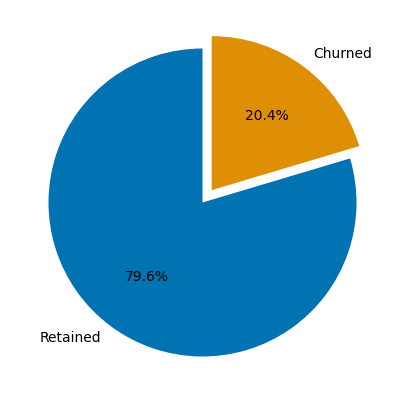

In [59]:
plt.figure(figsize=(5, 5))
plt.pie(df['Exited'].value_counts(), 
        labels=['Retained', 'Churned'], 
        startangle=90, 
        autopct='%1.1f%%',
        colors=sns.color_palette('colorblind'),
        explode=[0,0.1])

The overall churn rate is **20.4%**. 
###### As a side note, we already could have inferred this value from the mean value of Exited, in the df.describe() step.

### Which metrics have an impact on churn?

<Axes: >

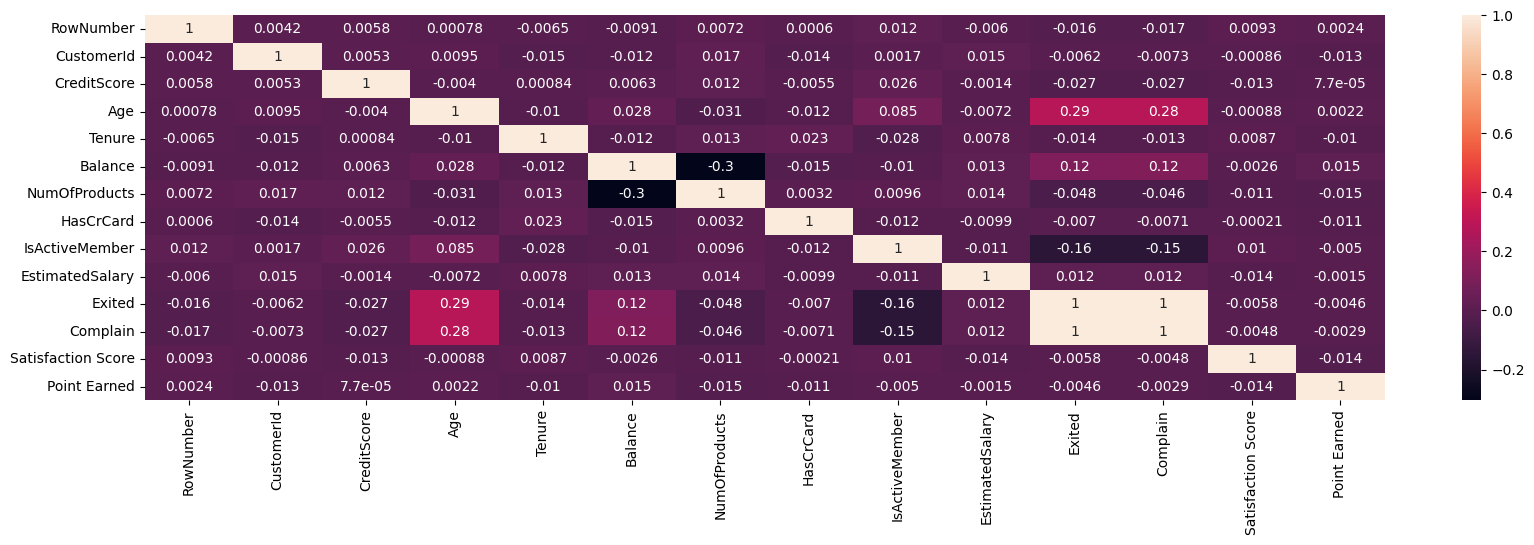

In [8]:
plt.figure(figsize=(20, 5))
sns.heatmap(df.corr(numeric_only = True), annot = True)

As far as the *Exited* field is concerned, there is a perfect correlation (1.0) with the *Complain* field. There also seems to exist a low correlation (0.29) betweeen *Exited* and *Age

Next, we will check the churn ratio in various categories using 100% stacked bar plots. In order to make the results more clear, we will divide continuous values (age, account balance, salary) into bins. Bin ranges for balance and salary chosen based on the df.describe() operation.

In [25]:
# group customer ages into bins
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 19, 33, 46, 61, 76, np.inf],labels=['<18', '18-32', '33-45', '46-60', '60-75', '>75'])

# group account balances into bins
df['BalanceCategory'] = pd.cut(df['Balance'], bins=6, labels=False)

# group estimated salary into bins
df['SalaryCategory'] = pd.cut(df['EstimatedSalary'], 6, labels=False)

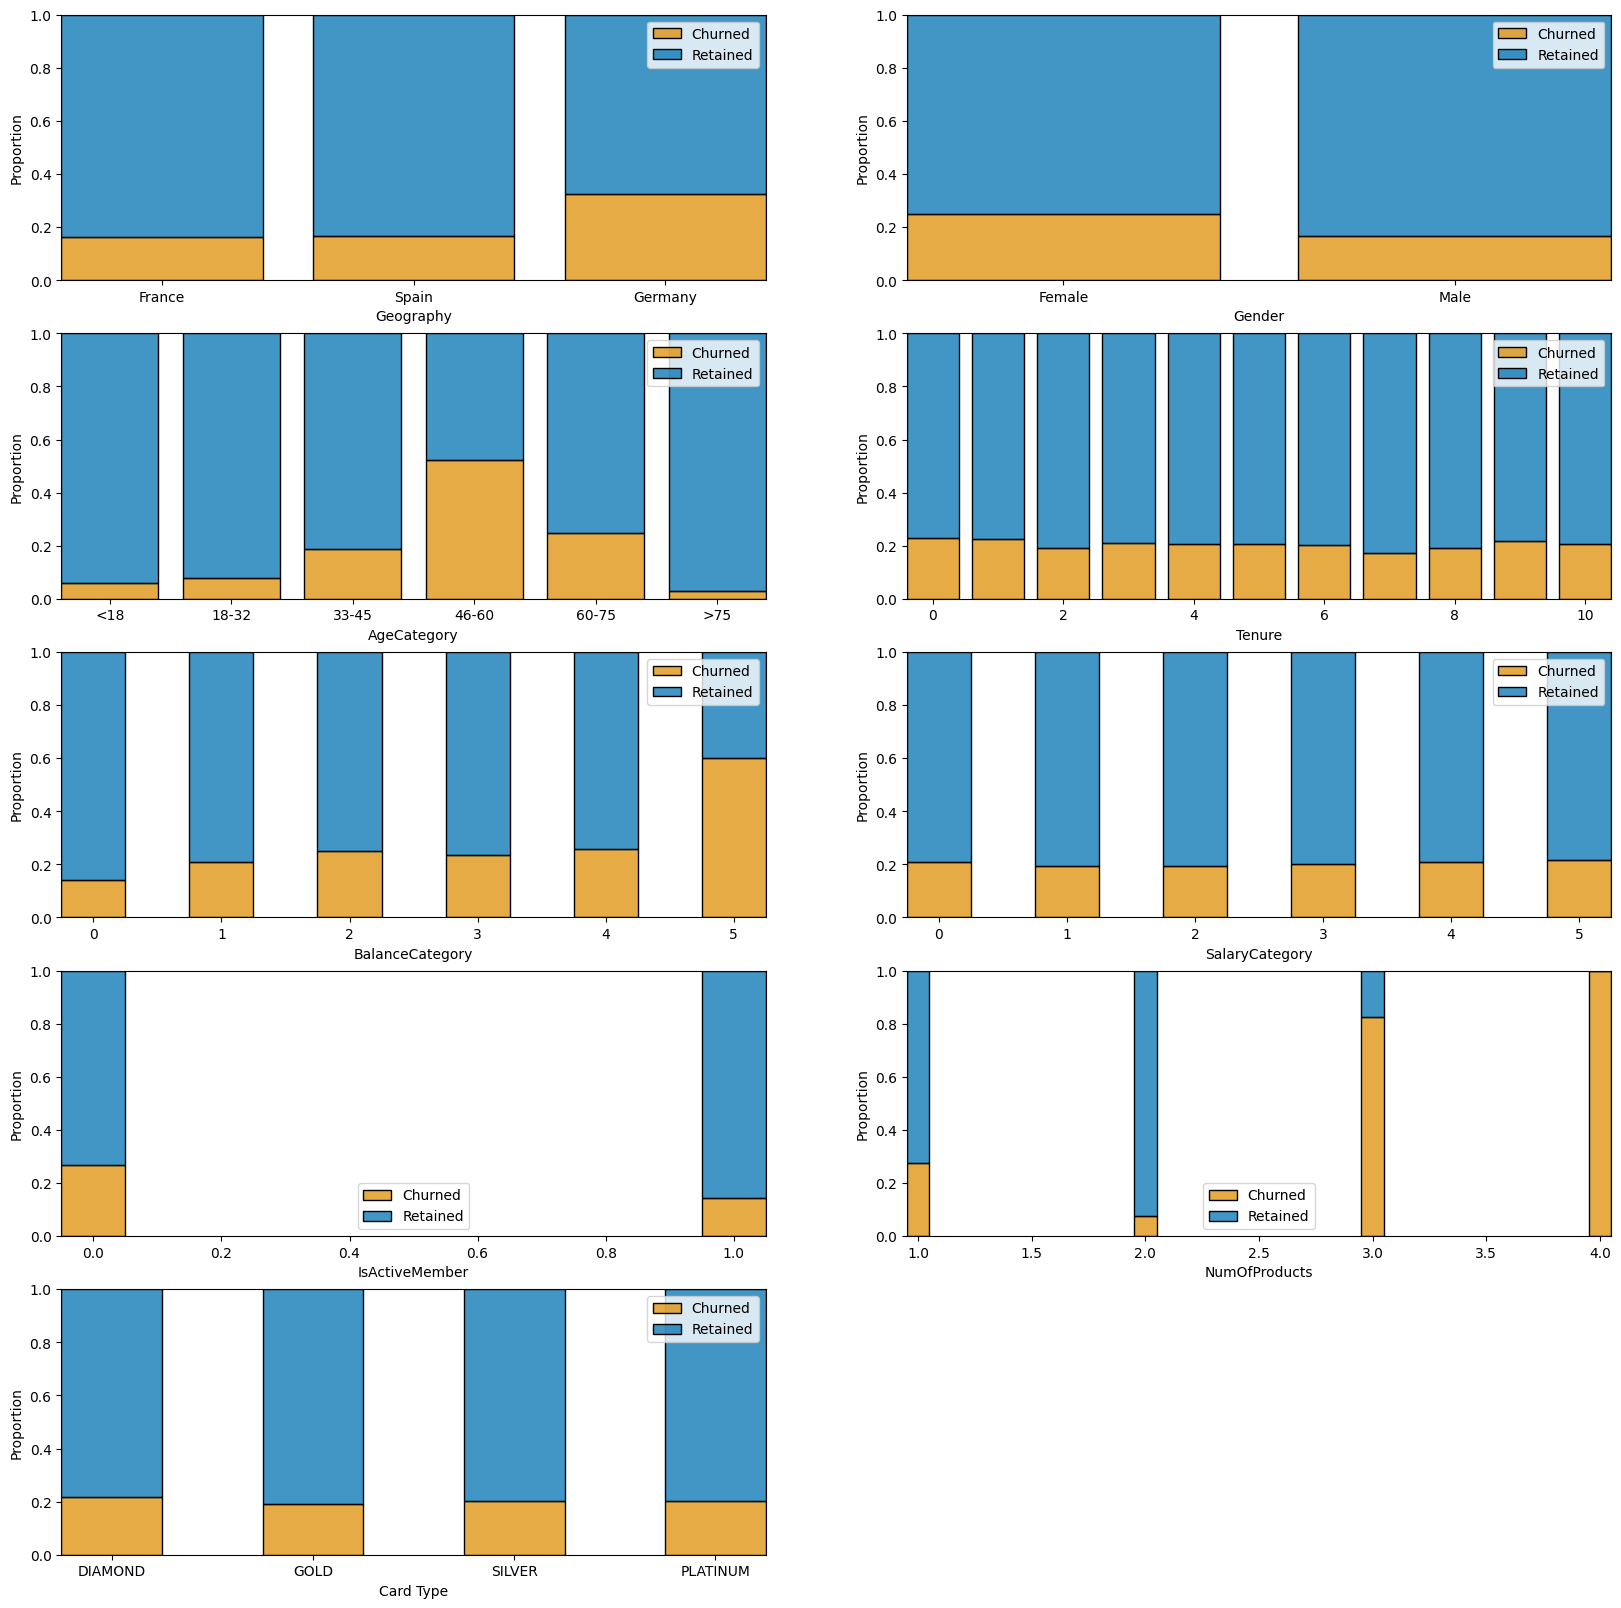

In [37]:
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 1)
sns.histplot(data=df, x='Geography', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=.8, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 2)
sns.histplot(data=df, x='Gender', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=.8, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 3)
sns.histplot(data=df, x='AgeCategory', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=.8, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 4)
sns.histplot(data=df, x='Tenure', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=.8, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 5)
sns.histplot(data=df, x='BalanceCategory', hue='Exited', multiple='fill', bins=10, stat='proportion', discrete=True, shrink=.5, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 6)
sns.histplot(data=df, x='SalaryCategory', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=.5, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 7)
sns.histplot(data=df, x='IsActiveMember', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=0.1, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 8)
sns.histplot(data=df, x='NumOfProducts', hue='Exited',  multiple='fill', stat='proportion', discrete=True, shrink=0.1, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

plt.subplot(5, 2, 9)
sns.histplot(data=df, x='Card Type', hue='Exited', multiple='fill', stat='proportion', discrete=True, shrink=.5, palette='colorblind')
plt.legend(labels = ['Churned', 'Retained'])

Observations:
- **Geography** - the churn ratio seems much higher in Germany than in France and Spain.
- **Gender** - the ratio of churned to retained customers seems to be higher among female customers.
- **Age** - we can see that the churn ratio is abnormally high in the 46-60 age bracket. 
- **Balance** - among customers with very high account balance the churn ratio is much higher.
- **IsActiveMember** - customers categorized as inactive (not engaged) have highter churn ratio.
- **NumOfProducts** - among customers with 3 or 4 products the churn ratio is much higher, above 80%.

In [40]:
# check churn ratio and total number of customers per country
print(df.groupby('Geography')['Exited'].mean())
print(df.groupby('Geography')['Exited'].sum())

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64
Geography
France     811
Germany    814
Spain      413
Name: Exited, dtype: int64


France and Germany have almost equal number of customers, but the churn rate in Germany twice as high (**32%** vs. **16%**).

In [39]:
# check churn ratio and total number of customers per gender
print(df.groupby('Gender')['Exited'].mean())
print(df.groupby('Gender')['Exited'].sum())

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64
Gender
Female    1139
Male       899
Name: Exited, dtype: int64


While most of the customers are female, churn rate is also higher among female customers (**25%**) than male customers (**16%**).

In [38]:
# check churn ratio and total number of customers per age category
print(df.groupby('AgeCategory')['Exited'].mean())
print(df.groupby('AgeCategory')['Exited'].sum())

AgeCategory
<18      0.061224
18-32    0.079799
33-45    0.187385
46-60    0.523745
60-75    0.246684
>75      0.029412
Name: Exited, dtype: float64
AgeCategory
<18        3
18-32    254
33-45    915
46-60    772
60-75     93
>75        1
Name: Exited, dtype: int64


In the **46-60** age bracket, **52%** of customers have churned. This age bracket is the 2nd overall most populated.

In [32]:
# check churn ratio and total number of customers per balance
print(df.groupby('BalanceCategory')['Exited'].mean())
print(df.groupby('BalanceCategory')['Exited'].sum())
print(df.groupby('BalanceCategory')['Balance'].min())

BalanceCategory
0    0.140356
1    0.207736
2    0.248561
3    0.234734
4    0.256757
5    0.600000
Name: Exited, dtype: float64
BalanceCategory
0    513
1    145
2    734
3    542
4     95
5      9
Name: Exited, dtype: int64
BalanceCategory
0         0.00
1     42157.08
2     83693.34
3    125456.07
4    167268.98
5    209490.21
Name: Balance, dtype: float64


There is 60% churn ration among customers with the highest balance (meaning over 209.000$), however the sample size is small at only 9 people.

In [ ]:
# check churn ratio and total number of customers per activity
print(df.groupby('IsActiveMember')['Exited'].mean())
print(df.groupby('IsActiveMember')['Exited'].sum())

Churn rate is noticeably higher among inactive customers (**26.87%**) compared to active customers (**14.27%**). The majority of customers are categorized as inactive.

In [ ]:
# check churn ratio and total number of customers per number of products
print(df.groupby('NumOfProducts')['Exited'].mean())
print(df.groupby('NumOfProducts')['Exited'].sum())

The lowest churn ratio is observed among customers with 2 products (**7.6%**). The ratio grows drastically (to **82.7%**) for customers who purchased 3 products. While it is the least numerous group, all 60 customers who purchased 4 products have churned. 

